In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [60]:
sample = np.array([[1, 0, 1], [0, 1, 5], [1, 1, 2]])

In [61]:
def PSIFunc(sample):
    n = len(sample)
    return sample[:, :-1]

def FFunc(sample):
    PSI = PSIFunc(sample)
    return PSI.T @ PSI

def BetaFunc(sample):
    Y = sample[:, -1]
    PSI = PSIFunc(sample)
    F = FFunc(sample)
    return np.array(np.linalg.inv(F) @ PSI.T @ Y)

def EFunc(sample):
    Y = sample[:, -1]
    PSI = PSIFunc(sample)
    return np.array(Y - PSI @ BetaFunc(sample))

def RSSFunc(sample):
    e = EFunc(sample)
    return e @ e.T

def TSSFunc(sample):
    Y = sample[:, -1]
    mean = np.mean(Y)
    return np.sum((Y - mean) ** 2)

def R2Func(sample):
    tss = TSSFunc(sample)
    rss = RSSFunc(sample)
    return (tss - rss) / tss

def PrintEq(beta):
    for i in range(len(beta)):
        print(f"{abs(round(beta[i], 1))}*x{i} ", end='')
    print('+ e')
    
def YFunc(sample):
    return sample[:, -1]

In [62]:
BetaFunc(sample)

array([-0.33333333,  3.66666667])

In [63]:
def eTe(beta, sample):
    y = YFunc(sample)
    psi = PSIFunc(sample)
    e = y - psi @ beta
    return e.T @ e

def LRIDGE(beta, lambd, sample):
    return eTe(beta, sample) + lambd * np.sum(beta ** 2)

In [64]:
def CVSSFunc(sample, func):
    s = 0
    N = 100
    d_max1 = 1000000000
    d_max2 = 1000000000
    cvss = np.array([0.] * N)
    lambds = np.linspace(0, 10, N)
    for i in range(len(sample)):
        cur_sample = np.delete(sample, i, 0)
        psi = PSIFunc(cur_sample)
        psi0 = PSIFunc(sample)[i]
        Y = YFunc(sample)
        cvss_i = []
        for l in lambds:
            beta = minimize(func, (5, 5), args=(l, cur_sample)).x
            d = (Y[i] - psi0 @ beta) ** 2
            cvss_i.append(d)
            if (l == lambds[57] and d < d_max1): #57 индекс минимума для лассо
                d_max1 = d
                beta_saved1 = beta
            if (l == lambds[15] and d < d_max2):#ридге индекс минимума для лассо
                d_max2 = d
                beta_saved2 = beta
            
        cvss += np.array(cvss_i)
    print(beta_saved1)
    print(beta_saved2)
    return cvss

In [65]:
MinIndex(s)

15

[0.16559223 0.8809978 ]
[0.39759036 1.9879518 ]
1.5151515151515151


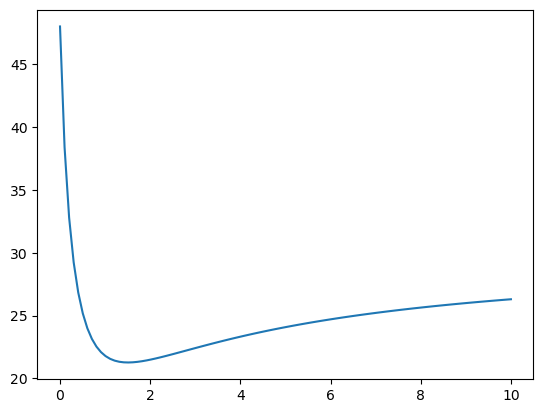

In [66]:
N = 100
lambds = np.linspace(0, 10, N)
s = CVSSFunc(sample, LRIDGE)
plt.plot(lambds, s)
print(lambds[MinIndex(s)])

In [67]:
def LLASSO(beta, lambd, sample):
    return eTe(beta, sample) + lambd * np.sum(np.abs(beta))

In [68]:
s2 = CVSSFunc(sample, LLASSO)

[-1.29935715e-09  2.10225220e+00]
[-0.72727266  3.48484845]


5.757575757575758


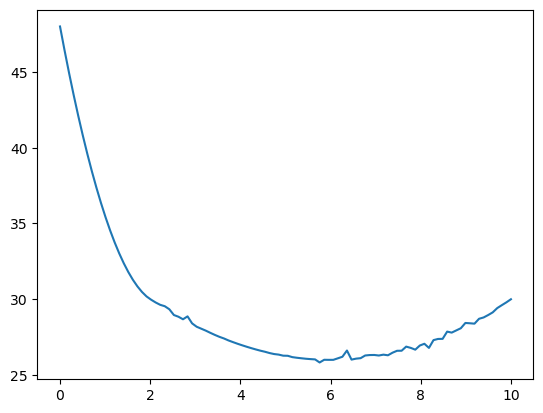

In [69]:
plt.plot(lambds, s2)
print(lambds[MinIndex(s2)])

In [70]:
def MinIndex(arr):
    return np.where(arr == np.min(arr))[0][0]

def MaxIndex(arr):
    return np.where(arr == np.max(arr))[0][0]